In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("housing_chuo_line_prep.csv")

In [8]:
df.head()

,renovate,years,uid,distance(min),price,rooms,sqrm,station,express,distance
0,0,6,13101-1,4,40000000,１ＬＤＫ,30,飯田橋,0,2.983801
1,1,12,13101-2,4,130000000,３ＬＤＫ,80,飯田橋,0,2.983801
2,1,12,13101-5,4,100000000,２ＬＤＫ＋Ｓ,65,飯田橋,0,2.983801
3,0,34,13101-7,3,24000000,１ＬＤＫ,35,飯田橋,0,2.983801
4,0,37,13101-8,4,13000000,１ＤＫ,20,飯田橋,0,2.983801


In [9]:
t = df["price"]
t.dtype

dtype('int64')

In [10]:
t.shape

(3634,)

In [11]:
x = df.iloc[:,[0,1,3,5,6,8,9]]
x.head()

,renovate,years,distance(min),rooms,sqrm,express,distance
0,0,6,4,１ＬＤＫ,30,0,2.983801
1,1,12,4,３ＬＤＫ,80,0,2.983801
2,1,12,4,２ＬＤＫ＋Ｓ,65,0,2.983801
3,0,34,3,１ＬＤＫ,35,0,2.983801
4,0,37,4,１ＤＫ,20,0,2.983801


In [12]:
x.dtypes

renovate           int64
years              int64
distance(min)      int64
rooms             object
sqrm               int64
express            int64
distance         float64
dtype: object

In [13]:
x = pd.get_dummies(x)
x.head()

,renovate,years,distance(min),sqrm,express,distance,rooms_１ＤＫ,rooms_１ＬＤＫ,rooms_２ＤＫ,rooms_２ＬＤＫ＋Ｓ,rooms_３ＤＫ,rooms_３ＬＤＫ
0,0,6,4,30,0,2.983801,0,1,0,0,0,0
1,1,12,4,80,0,2.983801,0,0,0,0,0,1
2,1,12,4,65,0,2.983801,0,0,0,1,0,0
3,0,34,3,35,0,2.983801,0,1,0,0,0,0
4,0,37,4,20,0,2.983801,1,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_val, t_train, t_val = train_test_split(x, t, test_size=0.3, random_state=0)
print("training data : ", x_train.shape, t_train.shape)
print("verification  data : ", x_val.shape, t_val.shape)

training data :  (2543, 12) (2543,)
verification  data :  (1091, 12) (1091,)


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(x_train, t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
model.score(x_train, t_train)

0.7864561407464761

In [20]:
model.score(x_val, t_val)

0.8032548203045051

In [21]:
y = model.predict(x)

In [22]:
y = pd.DataFrame(y, columns=["predict"])

In [23]:
y.head()

,predict
0,4.402419e+07
1,8.159866e+07
2,7.321992e+07
3,3.212723e+07
4,1.663977e+07


In [24]:
results = pd.concat([df,y],axis=1)

In [25]:
results.head()

,renovate,years,uid,distance(min),price,rooms,sqrm,station,express,distance,predict
0,0,6,13101-1,4,40000000,１ＬＤＫ,30,飯田橋,0,2.983801,4.402419e+07
1,1,12,13101-2,4,130000000,３ＬＤＫ,80,飯田橋,0,2.983801,8.159866e+07
2,1,12,13101-5,4,100000000,２ＬＤＫ＋Ｓ,65,飯田橋,0,2.983801,7.321992e+07
3,0,34,13101-7,3,24000000,１ＬＤＫ,35,飯田橋,0,2.983801,3.212723e+07
4,0,37,13101-8,4,13000000,１ＤＫ,20,飯田橋,0,2.983801,1.663977e+07


In [26]:
results[['uid','predict']].to_csv('result_uid_predict.csv')

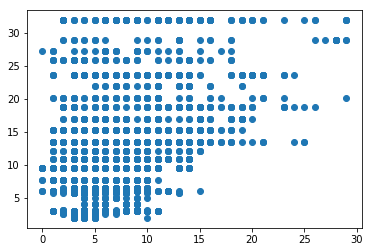

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(results["distance(min)"],results["distance"]) #最寄り駅からの距離、東京駅からの距離

In [1]:
import tabpy_client
client = tabpy_client.Client("http://localhost:9004/")

In [38]:
def housingprice(years, minutes, sqrm, distance, renovate, express,\
                rooms_1k_1dk, rooms_1ldk,rooms_2k_2dk, rooms_2ldk,rooms_3dk,rooms_3ldk):
    
        import pandas as pd
        years = pd.DataFrame(years)
        minutes = pd.DataFrame(minutes)
        sqrm = pd.DataFrame(sqrm)
        distance = pd.DataFrame(distance)
        renovate = pd. DataFrame(renovate)
        express = pd.DataFrame(express)
        rooms_1k_1dk = pd.DataFrame(rooms_1k_1dk)
        rooms_1ldk = pd.DataFrame(rooms_1ldk)
        rooms_2k_2dk = pd.DataFrame(rooms_2k_2dk)
        rooms_2ldk = pd.DataFrame(rooms_2ldk)
        rooms_3dk = pd.DataFrame(rooms_3dk)
        rooms_3ldk = pd.DataFrame(rooms_3ldk)
        
        data = pd.concat([years, minutes, sqrm, distance, renovate, express,\
                rooms_1k_1dk, rooms_1ldk,rooms_2k_2dk, rooms_2ldk,rooms_3dk,rooms_3ldk],axis=1)
        
        y= model.predict(data)
        
        return y.tolist()

In [39]:
client.deploy('housingprice', housingprice, 'Predict Real Estate Price', override = True)

In [37]:
x.columns

Index(['renovate', 'years', 'distance(min)', 'sqrm', 'express', 'distance',
       'rooms_１ＤＫ', 'rooms_１ＬＤＫ', 'rooms_２ＤＫ', 'rooms_２ＬＤＫ＋Ｓ', 'rooms_３ＤＫ',
       'rooms_３ＬＤＫ'],
      dtype='object')

In [40]:
import numpy as np

years = x['years'].values.tolist()
minutes = x['distance(min)'].values.tolist()
sqrm = x['sqrm'].values.tolist()
distance = x['distance'].values.tolist()
renovate = x['renovate'].values.tolist()
express = x['express'].values.tolist()

rooms_1k_1dk = x['rooms_１ＤＫ'].values.tolist()
rooms_1ldk = x['rooms_１ＬＤＫ'].values.tolist()
rooms_2k_2dk = x['rooms_２ＤＫ'].values.tolist()
rooms_2ldk = x['rooms_２ＬＤＫ＋Ｓ'].values.tolist()
rooms_3dk = x['rooms_３ＤＫ'].values.tolist()
rooms_3ldk = x['rooms_３ＬＤＫ'].values.tolist()

In [41]:
results = client.query('housingprice',years, minutes, sqrm, distance, renovate, express,\
                rooms_1k_1dk, rooms_1ldk,rooms_2k_2dk, rooms_2ldk,rooms_3dk,rooms_3ldk)

In [43]:
results ["response"]

[30486407.014712047,
 20482211.88401428,
 31720286.574399408,
 110784522.10798019,
 125502194.51605722,
 111385040.10958672,
 98807927.11676711,
 114303885.64838162,
 26716857.521337837,
 112829339.79953733,
 107167509.17341799,
 62945716.71388472,
 25256397.25795553,
 62945716.71388472,
 107167509.17341799,
 61566912.58874071,
 107564463.73315176,
 117222731.1871765,
 26319902.961604055,
 17960320.904953167,
 107167509.17341799,
 107564463.73315176,
 32117241.13413319,
 123733407.6022642,
 26716857.521337837,
 118236110.50524554,
 18498647.877370447,
 18498647.877370447,
 18498647.877370447,
 30774548.034156546,
 30774548.034156546,
 52133696.43879256,
 33635783.09495104,
 66159866.59135083,
 24336338.954960227,
 40498311.05298789,
 63241021.05255594,
 141858830.39649567,
 144664905.19918805,
 144664905.19918805,
 142255784.95622945,
 141858830.39649567,
 142255784.95622945,
 142255784.95622945,
 147583750.73798296,
 147008721.42548203,
 144664905.19918805,
 138736421.41582802,
 14466

In [44]:
client.get_endpoints()['housingprice']

{'name': 'housingprice', 'schema': None, 'version': 3, 'dependencies': [], 'creation_time': datetime.datetime(2020, 10, 3, 2, 52, 32), 'description': 'Predict Real Estate Price', 'last_modified_time': datetime.datetime(2020, 10, 3, 4, 27, 51), 'type': 'model'}

#predict price(Tableau内)
SCRIPT_REAL(
"

return tabpy.query('housingprice',_arg1,_arg2,_arg3,_arg4
,_arg5,_arg6,_arg7,_arg8,_arg9,_arg10,_arg11,_arg12)['response']

"
,
MAX([p_years]),
MAX([p_minutes]),
MAX([p_sqrm]),
MAX([p_distance]),
MAX([p_renovate]),
MAX([p_express]),
MAX([rooms_1k_1dk]),
MAX([rooms_1ldk]),
MAX([rooms_2dk]),
MAX([rooms_2ldk]),
MAX([rooms_3dk]),
MAX([rooms_3ldk])
)